In [1]:
from pyforest import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\HITARTH SHAH\Anaconda3\ANA_NAV\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

<IPython.core.display.Javascript object>

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.shape

(10000, 14)

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


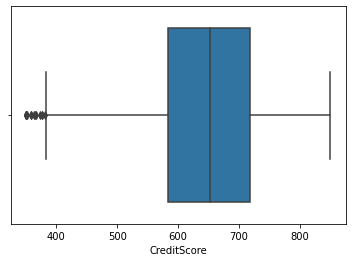

In [7]:
sns.boxplot(data['CreditScore'], data=data)

In [8]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [9]:
data.loc[data.CreditScore <= 400]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,1202,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [10]:
data1 = data.loc[data['CreditScore'] >= 400]

In [11]:
data1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data1.shape

(9981, 14)

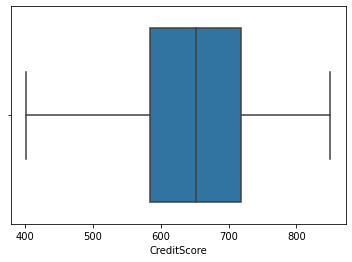

In [13]:
sns.boxplot(data1['CreditScore'], data=data1)

In [14]:
data1.drop(columns=['RowNumber', 'Surname'], inplace=True)

In [15]:
data1.shape

(9981, 12)

In [16]:
for each in ["CreditScore", "Balance", "EstimatedSalary"]:
    data1[each] = (data1[each] - np.min(data1[each])) / (np.max(data1[each])-np.min(data1[each]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
for each in ["Geography","Gender"]:
    data1[each] = data1[each].astype("category")

In [18]:
data1 = pd.get_dummies(data1, columns = ["Geography","Gender"])

<IPython.core.display.Javascript object>

In [19]:
data1.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,0.485523,42,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,15647311,0.461024,41,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,15619304,0.224944,42,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,15701354,0.663697,39,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,15737888,1.000000,43,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data1.drop(columns = ['Exited'], axis=1)
y = data1['Exited']

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [22]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7984
1997
7984
1997


In [23]:
print(np.shape(X_train))
print(np.shape(y_train))

<IPython.core.display.Javascript object>

(7984, 14)


<IPython.core.display.Javascript object>

(7984,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
data1.shape

(9981, 15)

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

def deep_model():
    classifier = Sequential()
    
    classifier.add(Dense(units=14, kernel_initializer='uniform', activation='tanh', input_dim=14))
    classifier.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
  #  classifier.add(Dense(units=4, kernel_initializer='uniform', activation='tanh'))
   # classifier.add(Dense(units=1, kernel_initializer='uniform', activation='tanh'))
    
    classifier.compile(optimizer='adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])
    
    return classifier

In [31]:
#from keras.models import load_model
#from keras.callbacks import EarlyStopping, ModelCheckpoint

#classifier = deep_model()

#callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
#output = classifier.fit(X_train, y_train, batch_size=32, callbacks=callbacks, epochs=100, validation_data=(X_val, y_val), shuffle=False)

In [32]:
model = KerasClassifier(build_fn=deep_model, epochs=15, batch_size=100)

In [33]:
history1 = model.fit(X_train, y_train)

Epoch 1/15
80/80 [==============================] - ETA: 0s - loss: 3.0587 - accuracy: 0.75 - ETA: 0s - loss: 1.4993 - accuracy: 0.78 - ETA: 0s - loss: 1.1959 - accuracy: 0.78 - ETA: 0s - loss: 1.0142 - accuracy: 0.79 - ETA: 0s - loss: 0.9092 - accuracy: 0.79 - 0s 3ms/step - loss: 0.8797 - accuracy: 0.7955
Epoch 2/15
80/80 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.78 - ETA: 0s - loss: 0.6468 - accuracy: 0.78 - ETA: 0s - loss: 0.6296 - accuracy: 0.78 - ETA: 0s - loss: 0.6068 - accuracy: 0.79 - ETA: 0s - loss: 0.5926 - accuracy: 0.79 - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7955
Epoch 3/15
80/80 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.80 - ETA: 0s - loss: 0.5273 - accuracy: 0.80 - ETA: 0s - loss: 0.5441 - accuracy: 0.79 - ETA: 0s - loss: 0.5373 - accuracy: 0.79 - ETA: 0s - loss: 0.5360 - accuracy: 0.79 - ETA: 0s - loss: 0.5262 - accuracy: 0.79 - 0s 4ms/step - loss: 0.5253 - accuracy: 0.7955
Epoch 4/15
80/80 [================

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
model = KerasClassifier(build_fn = deep_model, epochs=15, batch_size = 100)
kfold = StratifiedKFold(shuffle = True, random_state = 42)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold)

Epoch 1/15
64/64 [==============================] - ETA: 0s - loss: 2.9251 - accuracy: 0.75 - ETA: 0s - loss: 1.6892 - accuracy: 0.80 - ETA: 0s - loss: 1.2462 - accuracy: 0.79 - ETA: 0s - loss: 1.0509 - accuracy: 0.79 - ETA: 0s - loss: 0.9540 - accuracy: 0.79 - 0s 3ms/step - loss: 0.9524 - accuracy: 0.7955
Epoch 2/15
64/64 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.87 - ETA: 0s - loss: 0.6743 - accuracy: 0.79 - ETA: 0s - loss: 0.6564 - accuracy: 0.79 - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7955
Epoch 3/15
64/64 [==============================] - ETA: 0s - loss: 0.7479 - accuracy: 0.75 - ETA: 0s - loss: 0.5822 - accuracy: 0.79 - ETA: 0s - loss: 0.5788 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5776 - accuracy: 0.7955
Epoch 4/15
64/64 [==============================] - ETA: 0s - loss: 0.7645 - accuracy: 0.76 - ETA: 0s - loss: 0.5511 - accuracy: 0.79 - ETA: 0s - loss: 0.5364 - accuracy: 0.79 - ETA: 0s - loss: 0.5306 - accuracy: 0.79 - 0s 3ms/step - loss: 0.52

64/64 [==============================] - ETA: 0s - loss: 0.4477 - accuracy: 0.80 - ETA: 0s - loss: 0.4524 - accuracy: 0.80 - ETA: 0s - loss: 0.4549 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7954
Epoch 14/15
64/64 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.77 - ETA: 0s - loss: 0.4630 - accuracy: 0.79 - ETA: 0s - loss: 0.4597 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7954
Epoch 15/15
16/16 [==============================] - ETA: 0s - loss: 0.4172 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7959
Epoch 1/15
64/64 [==============================] - ETA: 0s - loss: 2.9836 - accuracy: 0.72 - ETA: 0s - loss: 1.3198 - accuracy: 0.79 - ETA: 0s - loss: 1.0541 - accuracy: 0.79 - ETA: 0s - loss: 0.9293 - accuracy: 0.79 - 0s 3ms/step - loss: 0.9076 - accuracy: 0.7954
Epoch 2/15
64/64 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.84 - ETA: 0s - loss: 0.6329 - accuracy: 0.79 - ETA: 0s - loss: 0.6

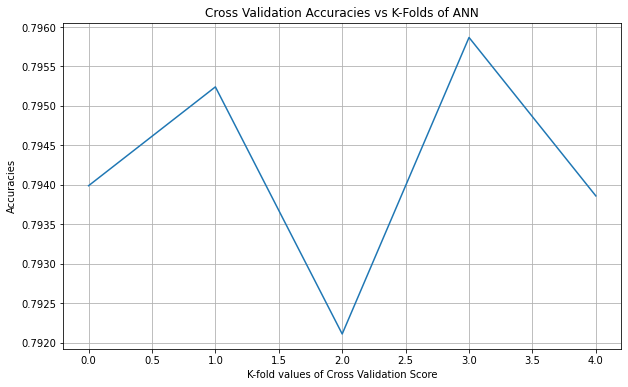

In [36]:
plt.subplots(figsize = (10,6))
plt.plot(accuracies)
plt.xlabel("K-fold values of Cross Validation Score")
plt.ylabel("Accuracies")
plt.title("Cross Validation Accuracies vs K-Folds of ANN")
plt.grid(axis = "both")

plt.show()

In [37]:
print("Best accuracy : {} @ k-fold value of {}".format(round(accuracies.max()*100,2),accuracies.argmax()))

Best accuracy : 79.59 @ k-fold value of 3


In [39]:
from sklearn.model_selection import GridSearchCV

def create_model1(optimizer="rmsprop", init="glorot_uniform"):
        
   
    model = Sequential()
    
   
    model.add(Dense(units = 14, kernel_initializer = init, activation = "relu", input_dim = 14))
    
   
    model.add(Dense(1, kernel_initializer = init, activation = "relu"))
    
   
  #  model.add(Dense(units = 4, kernel_initializer = init, activation = "relu"))
        
   
  #  model.add(Dense(units = 1, kernel_initializer = init, activation = "sigmoid"))
    
   
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model

In [40]:
model_new = KerasClassifier(build_fn = create_model1, epochs = 15, batch_size = 100)

optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'uniform']

param_grid = dict(optimizer = optimizers, init = init)
grid = GridSearchCV(estimator = model_new, param_grid = param_grid)

result = grid.fit(X_train, y_train)

Epoch 1/15
64/64 [==============================] - ETA: 0s - loss: 2.2379 - accuracy: 0.76 - ETA: 0s - loss: 2.3765 - accuracy: 0.75 - ETA: 0s - loss: 2.3359 - accuracy: 0.75 - 0s 2ms/step - loss: 2.2513 - accuracy: 0.7686
Epoch 2/15
64/64 [==============================] - ETA: 0s - loss: 1.8724 - accuracy: 0.81 - ETA: 0s - loss: 1.9353 - accuracy: 0.78 - ETA: 0s - loss: 2.0413 - accuracy: 0.78 - 0s 2ms/step - loss: 2.0560 - accuracy: 0.7861
Epoch 3/15
64/64 [==============================] - ETA: 0s - loss: 1.0856 - accuracy: 0.85 - ETA: 0s - loss: 2.0124 - accuracy: 0.78 - ETA: 0s - loss: 2.0416 - accuracy: 0.78 - ETA: 0s - loss: 1.9673 - accuracy: 0.79 - 0s 3ms/step - loss: 1.9248 - accuracy: 0.7927
Epoch 4/15
64/64 [==============================] - ETA: 0s - loss: 2.2992 - accuracy: 0.76 - ETA: 0s - loss: 2.0415 - accuracy: 0.77 - ETA: 0s - loss: 1.9105 - accuracy: 0.78 - ETA: 0s - loss: 1.8242 - accuracy: 0.79 - 0s 3ms/step - loss: 1.8130 - accuracy: 0.7969
Epoch 5/15
64/64 [==

64/64 [==============================] - ETA: 0s - loss: 2.5818 - accuracy: 0.64 - ETA: 0s - loss: 2.5396 - accuracy: 0.65 - ETA: 0s - loss: 2.4950 - accuracy: 0.65 - ETA: 0s - loss: 2.3900 - accuracy: 0.67 - 0s 3ms/step - loss: 2.3403 - accuracy: 0.6788
Epoch 2/15
64/64 [==============================] - ETA: 0s - loss: 2.6278 - accuracy: 0.66 - ETA: 0s - loss: 1.8800 - accuracy: 0.71 - ETA: 0s - loss: 1.8205 - accuracy: 0.72 - ETA: 0s - loss: 1.8758 - accuracy: 0.73 - 0s 3ms/step - loss: 1.8949 - accuracy: 0.7301
Epoch 3/15
64/64 [==============================] - ETA: 0s - loss: 1.3367 - accuracy: 0.83 - ETA: 0s - loss: 1.8836 - accuracy: 0.74 - ETA: 0s - loss: 1.8626 - accuracy: 0.74 - ETA: 0s - loss: 1.7459 - accuracy: 0.75 - 0s 3ms/step - loss: 1.7363 - accuracy: 0.7553
Epoch 4/15
64/64 [==============================] - ETA: 0s - loss: 1.5190 - accuracy: 0.76 - ETA: 0s - loss: 1.5590 - accuracy: 0.74 - ETA: 0s - loss: 1.5340 - accuracy: 0.75 - ETA: 0s - loss: 1.5080 - accuracy: 

Epoch 1/15
64/64 [==============================] - ETA: 0s - loss: 2.5126 - accuracy: 0.82 - ETA: 0s - loss: 2.7995 - accuracy: 0.79 - ETA: 0s - loss: 2.7254 - accuracy: 0.79 - 0s 2ms/step - loss: 2.6562 - accuracy: 0.7900
Epoch 2/15
64/64 [==============================] - ETA: 0s - loss: 3.1424 - accuracy: 0.71 - ETA: 0s - loss: 2.3578 - accuracy: 0.77 - ETA: 0s - loss: 2.2490 - accuracy: 0.77 - 0s 2ms/step - loss: 2.2009 - accuracy: 0.7786
Epoch 3/15
64/64 [==============================] - ETA: 0s - loss: 1.9560 - accuracy: 0.79 - ETA: 0s - loss: 1.7818 - accuracy: 0.77 - ETA: 0s - loss: 1.8345 - accuracy: 0.77 - 0s 2ms/step - loss: 1.8795 - accuracy: 0.7675
Epoch 4/15
64/64 [==============================] - ETA: 0s - loss: 1.6943 - accuracy: 0.76 - ETA: 0s - loss: 1.8143 - accuracy: 0.74 - ETA: 0s - loss: 1.6833 - accuracy: 0.75 - ETA: 0s - loss: 1.7289 - accuracy: 0.75 - ETA: 0s - loss: 1.7372 - accuracy: 0.75 - ETA: 0s - loss: 1.7329 - accuracy: 0.75 - ETA: 0s - loss: 1.7590 -

64/64 [==============================] - ETA: 0s - loss: 1.9829 - accuracy: 0.74 - ETA: 0s - loss: 1.8561 - accuracy: 0.77 - ETA: 0s - loss: 1.8985 - accuracy: 0.76 - ETA: 0s - loss: 1.8896 - accuracy: 0.76 - 0s 3ms/step - loss: 1.8813 - accuracy: 0.7642
Epoch 12/15
64/64 [==============================] - ETA: 0s - loss: 1.2942 - accuracy: 0.75 - ETA: 0s - loss: 1.8259 - accuracy: 0.76 - ETA: 0s - loss: 1.8248 - accuracy: 0.76 - ETA: 0s - loss: 1.8410 - accuracy: 0.75 - ETA: 0s - loss: 1.8414 - accuracy: 0.76 - 0s 4ms/step - loss: 1.8240 - accuracy: 0.7625
Epoch 13/15
64/64 [==============================] - ETA: 0s - loss: 1.9200 - accuracy: 0.75 - ETA: 0s - loss: 1.7947 - accuracy: 0.75 - ETA: 0s - loss: 1.8329 - accuracy: 0.75 - ETA: 0s - loss: 1.8635 - accuracy: 0.74 - ETA: 0s - loss: 1.7820 - accuracy: 0.75 - ETA: 0s - loss: 1.8124 - accuracy: 0.75 - ETA: 0s - loss: 1.8020 - accuracy: 0.76 - ETA: 0s - loss: 1.7848 - accuracy: 0.76 - 0s 6ms/step - loss: 1.7670 - accuracy: 0.7657
E

64/64 [==============================] - ETA: 0s - loss: 0.2916 - accuracy: 0.89 - ETA: 0s - loss: 0.3824 - accuracy: 0.82 - ETA: 0s - loss: 0.3765 - accuracy: 0.83 - ETA: 0s - loss: 0.3741 - accuracy: 0.83 - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8369
Epoch 10/15
64/64 [==============================] - ETA: 0s - loss: 0.3703 - accuracy: 0.82 - ETA: 0s - loss: 0.3634 - accuracy: 0.83 - ETA: 0s - loss: 0.3673 - accuracy: 0.83 - ETA: 0s - loss: 0.3709 - accuracy: 0.83 - 0s 3ms/step - loss: 0.3703 - accuracy: 0.8409
Epoch 11/15
64/64 [==============================] - ETA: 0s - loss: 0.3275 - accuracy: 0.86 - ETA: 0s - loss: 0.3451 - accuracy: 0.85 - ETA: 0s - loss: 0.3642 - accuracy: 0.84 - ETA: 0s - loss: 0.3665 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8439
Epoch 12/15
64/64 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.82 - ETA: 0s - loss: 0.3778 - accuracy: 0.83 - ETA: 0s - loss: 0.3741 - accuracy: 0.84 - ETA: 0s - loss: 0.3731 - accurac

64/64 [==============================] - ETA: 0s - loss: 0.3183 - accuracy: 0.89 - ETA: 0s - loss: 0.4235 - accuracy: 0.80 - ETA: 0s - loss: 0.4118 - accuracy: 0.81 - ETA: 0s - loss: 0.4164 - accuracy: 0.80 - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8085
Epoch 7/15
64/64 [==============================] - ETA: 0s - loss: 0.4292 - accuracy: 0.81 - ETA: 0s - loss: 0.4098 - accuracy: 0.81 - ETA: 0s - loss: 0.4125 - accuracy: 0.81 - ETA: 0s - loss: 0.4089 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8129
Epoch 8/15
64/64 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.78 - ETA: 0s - loss: 0.3999 - accuracy: 0.82 - ETA: 0s - loss: 0.4006 - accuracy: 0.81 - ETA: 0s - loss: 0.4038 - accuracy: 0.81 - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8159
Epoch 9/15
64/64 [==============================] - ETA: 0s - loss: 0.4533 - accuracy: 0.79 - ETA: 0s - loss: 0.3956 - accuracy: 0.82 - ETA: 0s - loss: 0.4015 - accuracy: 0.81 - ETA: 0s - loss: 0.4013 - accuracy: 

80/80 [==============================] - ETA: 0s - loss: 0.4196 - accuracy: 0.89 - ETA: 0s - loss: 0.4033 - accuracy: 0.84 - ETA: 0s - loss: 0.3799 - accuracy: 0.84 - ETA: 0s - loss: 0.3984 - accuracy: 0.84 - ETA: 0s - loss: 0.3879 - accuracy: 0.84 - ETA: 0s - loss: 0.3877 - accuracy: 0.84 - ETA: 0s - loss: 0.3886 - accuracy: 0.84 - 0s 4ms/step - loss: 0.3859 - accuracy: 0.8497
Epoch 15/15
80/80 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.89 - ETA: 0s - loss: 0.3581 - accuracy: 0.86 - ETA: 0s - loss: 0.3807 - accuracy: 0.85 - ETA: 0s - loss: 0.3764 - accuracy: 0.85 - ETA: 0s - loss: 0.3852 - accuracy: 0.85 - ETA: 0s - loss: 0.3889 - accuracy: 0.85 - ETA: 0s - loss: 0.3885 - accuracy: 0.85 - 0s 5ms/step - loss: 0.3881 - accuracy: 0.8523


In [41]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.846069 using {'init': 'uniform', 'optimizer': 'rmsprop'}
0.812876 (0.014415) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.772545 (0.014726) with: {'init': 'glorot_uniform', 'optimizer': 'adam'}
0.846069 (0.011470) with: {'init': 'uniform', 'optimizer': 'rmsprop'}
0.822520 (0.010279) with: {'init': 'uniform', 'optimizer': 'adam'}
